<a href="https://colab.research.google.com/github/jouherdauf/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Classification : Mobile Price Range Prediction**

##### **Project Type**    - Machine Learning/Supervised/Classification
##### **Contribution**    - Individual
##### **Name-** Jouher Lais Khan

### **Github Link -** https://github.com/jouherdauf/Mobile-Price-Range-Prediction

<h4><b>In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is</b></h4>

<h2><b>Data Description -</b></h2>
<ul>
<li><b>Battery_power -</b> Total energy a battery can store in one time measured in mAh</li>
<li><b>Blue -</b> Has bluetooth or not</li>
<li><b>Clock_speed -</b> speed at which microprocessor executes instructions</li>
<li><b>Dual_sim -</b> Has dual sim support or not</li>
<li><b>Fc -</b> Front Camera mega pixels</li>
<li><b>Four_g -</b> Has 4G or not</li>
<li><b>Int_memory -</b> Internal Memory in Gigabytes</li>
<li><b>M_dep -</b> Mobile Depth in cm</li>
<li><b>Mobile_wt -</b> Weight of mobile phone</li>
<li><b>N_cores -</b> Number of cores of processor</li>
<li><b>Pc -</b> Primary Camera mega pixels</li>
<li><b>Px_height -</b> Pixel Resolution Height</li>
<li><b>Px_width -</b> Pixel Resolution Width</li>
<li><b>Ram -</b> Random Access Memory in Mega</li>
<li><b>Touch_screen -</b> Has touch screen or not</li>
<li><b>Wifi -</b> Has wifi or not</li>
<li><b>Sc_h -</b> Screen Height of mobile in cm</li>
<li><b>Sc_w -</b> Screen Width of mobile in cm</li>
<li><b>Talk_time -</b> longest time that a single battery charge will last when you are</li>
<li><b>Three_g -</b> Has 3G or not</li>
<li><b>Wifi -</b> Has wifi or not</li>
<li><b>Price_range -</b> This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).</li>
</ul>

##Business Problem
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

####Approach
* Business Problem
* Data Collection and Preprocessing
      - Importing important libraries and modules
      - Data Cleaning
      - Missing Data Handling
* Exploratory Data Analysis

* Feature Selection and Outlier Detection
      - Feature Engineering
      - Outlier Detection and Treatment
* Modeling
      - Train Test Split
      - Logistic Regression(OLS)
      - Decision Tree,Random Forest with Hyper Parameter Tuning,xgBoost
      - K Nearest Neighbours
      - Naiye Bayes
      - Support Vector Machine
* Model Performance and Evaluation


* Conclusion and Recommendations


In [93]:
# importing  all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tunning
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold

#Model
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier #knn
from xgboost import XGBClassifier # xgboost
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import StackingClassifier # stacking

#evaluators
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore') # ignore the warning



In [94]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
df = pd.read_csv('/content/drive/MyDrive/Mobile Price/data_mobile_price_range.csv')
#Return the first 5 rows of the DataFrame
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [96]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [97]:
len(df.columns)

21

In [98]:
#bootom 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


# **Data Analysis**

In [99]:
#Description of the data
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Minimum value of px_height and sc_w cannot be zero so we need to handle that

In [100]:
# Total phones with sc_w = 0
print(f'Total phones with sc_w = 0 is {len(df[df.sc_w == 0])}')
# Total phones with px_height = 0
print(f'Total phones with px_height = 0 is {len(df[df.px_height == 0])}')

Total phones with sc_w = 0 is 180
Total phones with px_height = 0 is 2


In [101]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

###**Checking whether there is duplicates or not**

     

In [102]:
print(f"The duplicates row's are {len(df[df.duplicated()])} in number")

The duplicates row's are 0 in number


In [103]:
#The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [104]:

#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Exploratory Data Analysis**

## **price**

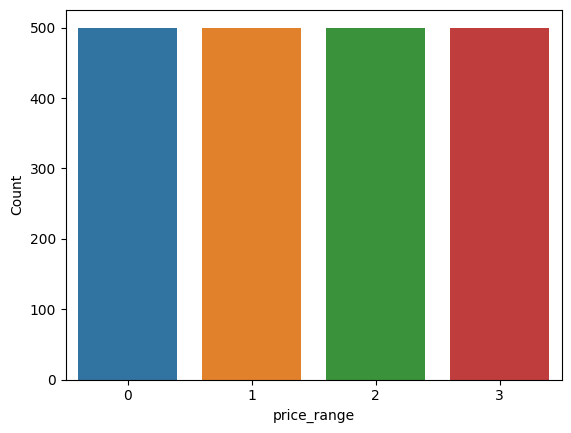

In [105]:
#classes
price_plot=df.groupby('price_range',as_index=False).count()
sns.barplot(x="price_range", y="blue",data=price_plot,errorbar = None)
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

There are mobile phones in 4 price ranges. The number of elements is almost similar.

## **Battery power**

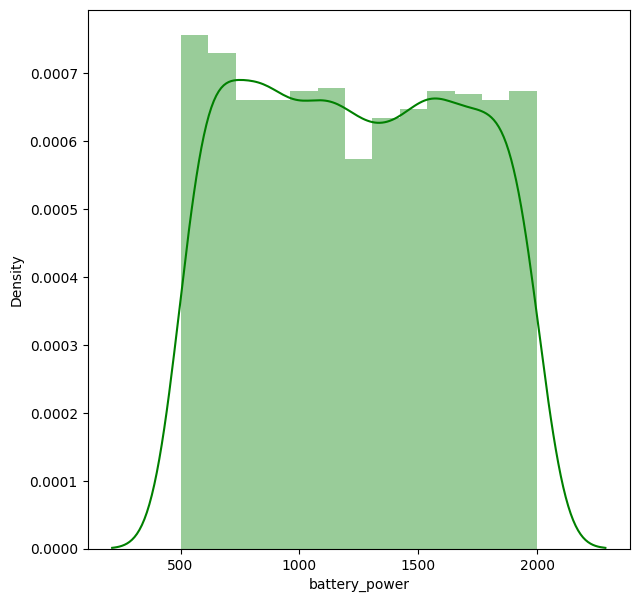

In [106]:
plt.figure(figsize=(7,7))
sns.distplot(df['battery_power'],color="g")
plt.show()

This plot shows how the battery mAh is spread. there is a gradual increase as the price range increases

## **Bluetooth**

<Axes: xlabel='blue', ylabel='price_range'>

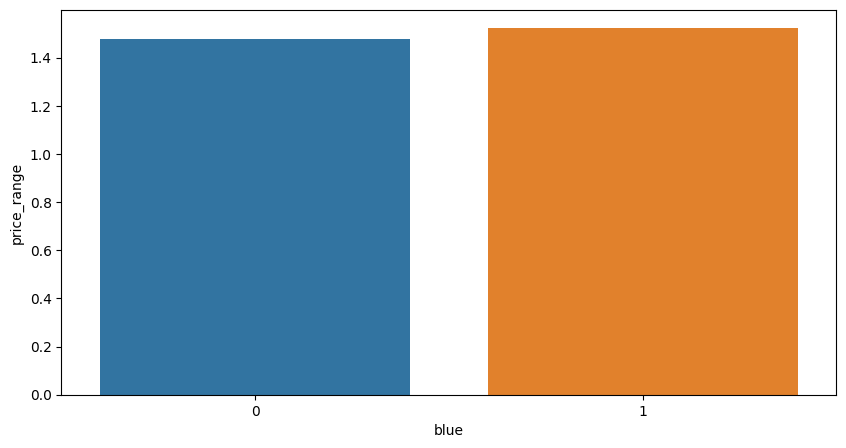

In [107]:
#anlysis of data by vizualisation
ab = df.groupby(['blue'],as_index = False)['price_range'].mean()
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=ab,x='blue',y='price_range',ax=ax)

Half the devices have Bluetooth, and half don’t.

## **RAM**

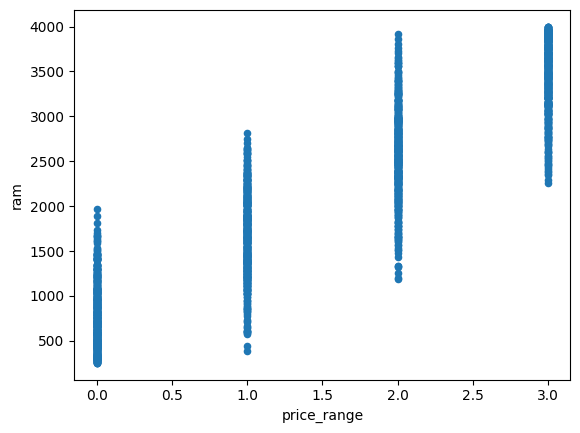

In [108]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

Ram has continuous increase with price range while moving from Low cost to Very high cost

##**Pixel_width**

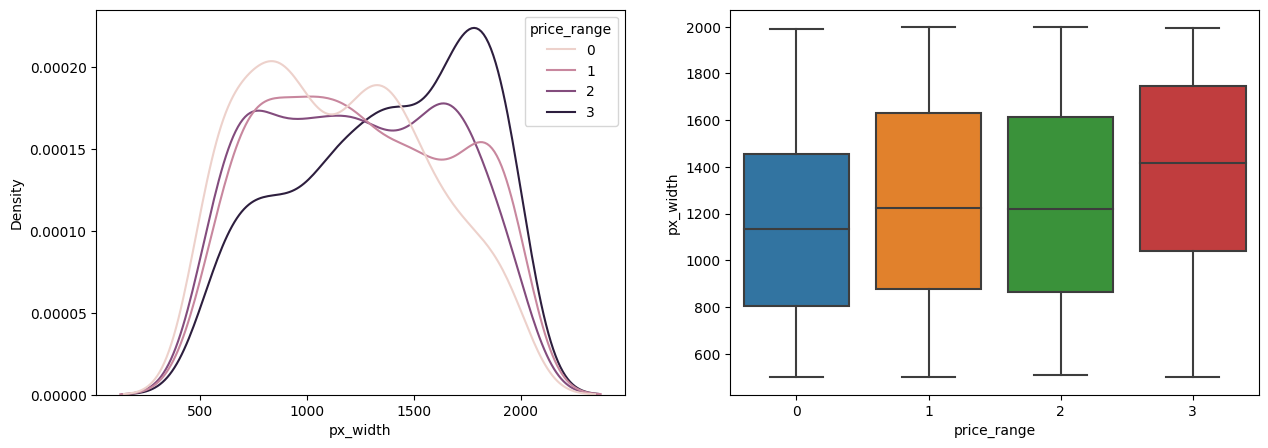

In [109]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

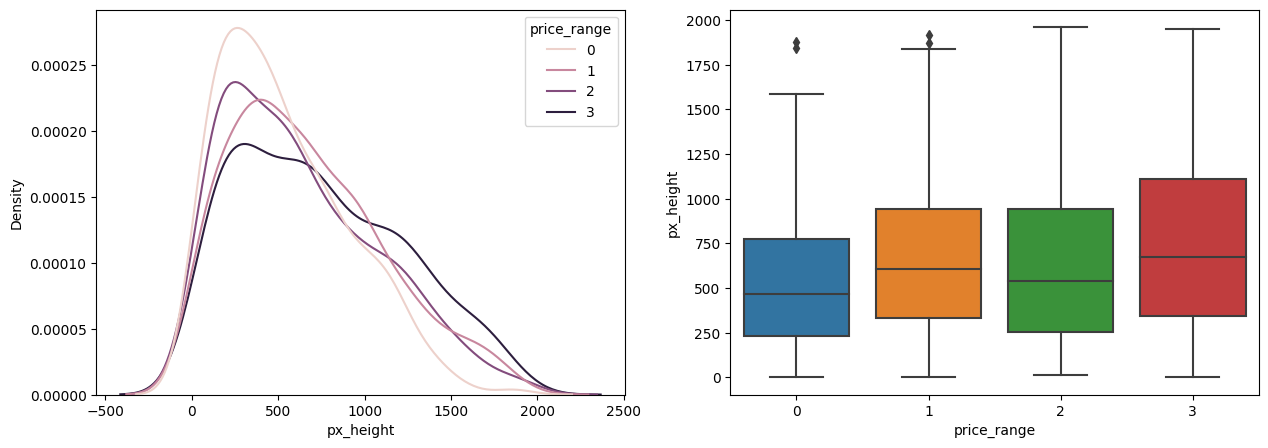

In [110]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

## **FC (front camera megapixels)**

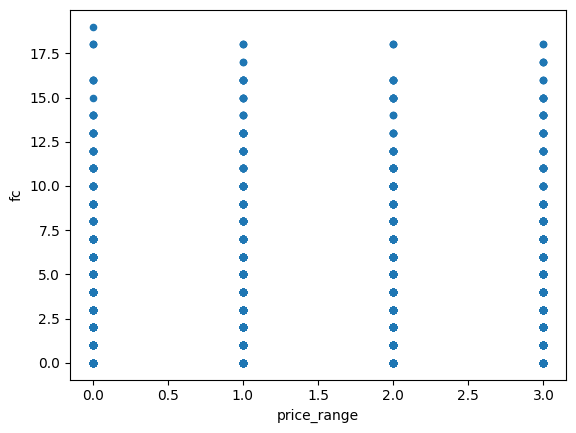

In [111]:
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions

##**PC (Primary camera Megapixels)**

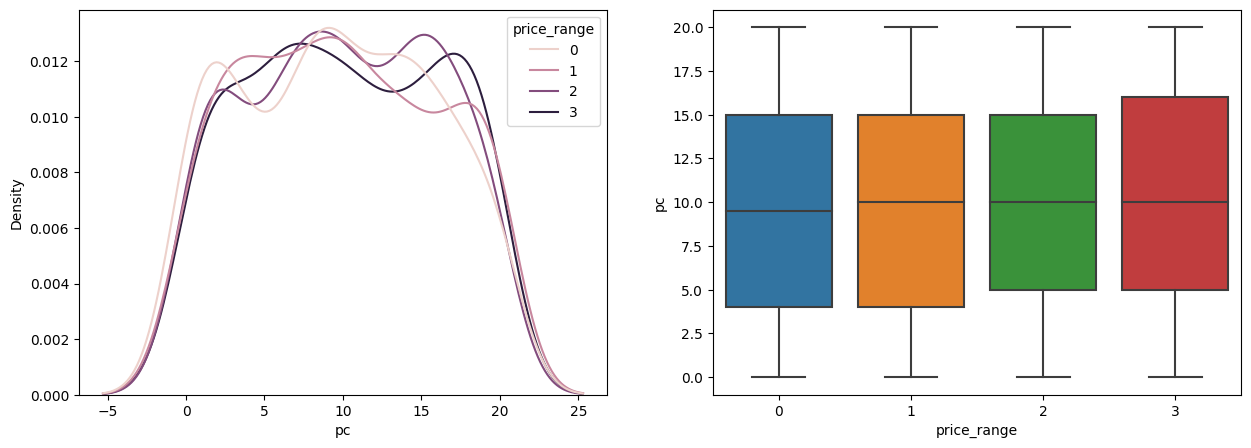

In [112]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='pc', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='pc', ax=axs[1])
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

## **Mobile weight**

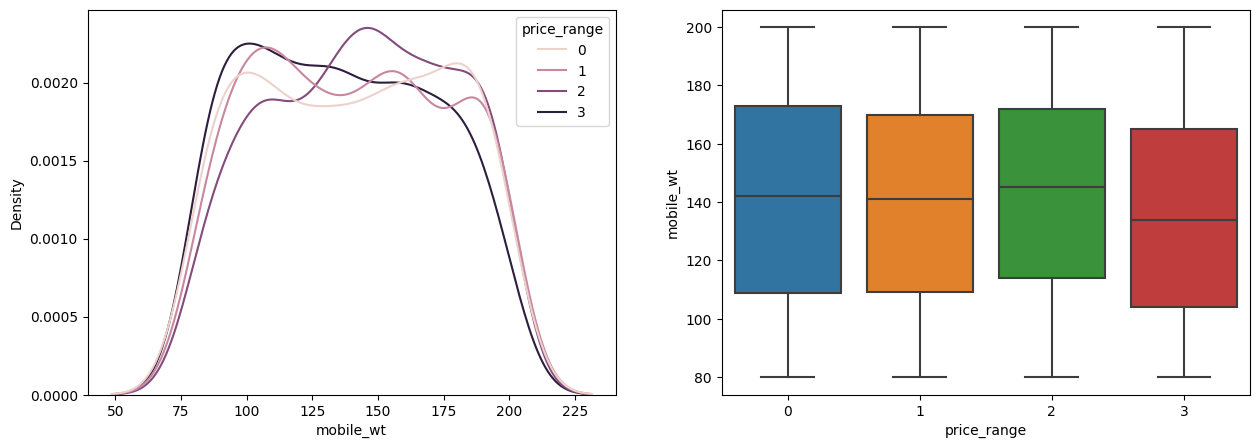

In [113]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

costly phones are lighter

## **screen_size**

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.

In [114]:
# Defining new variable sc_size

df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)

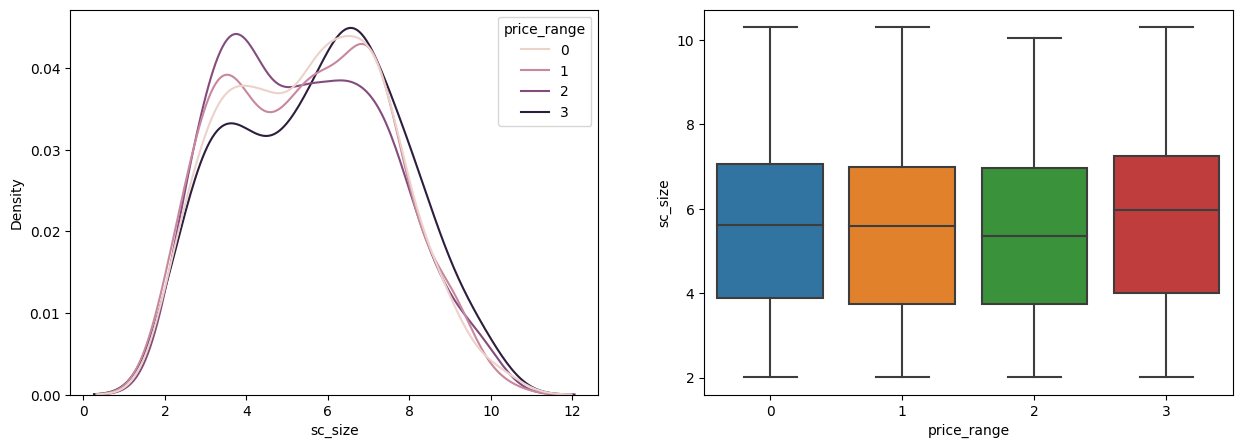

In [115]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

In [116]:
# Let's drop sc_h and s_w

df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [117]:
binary_features = [ 'four_g', 'three_g']

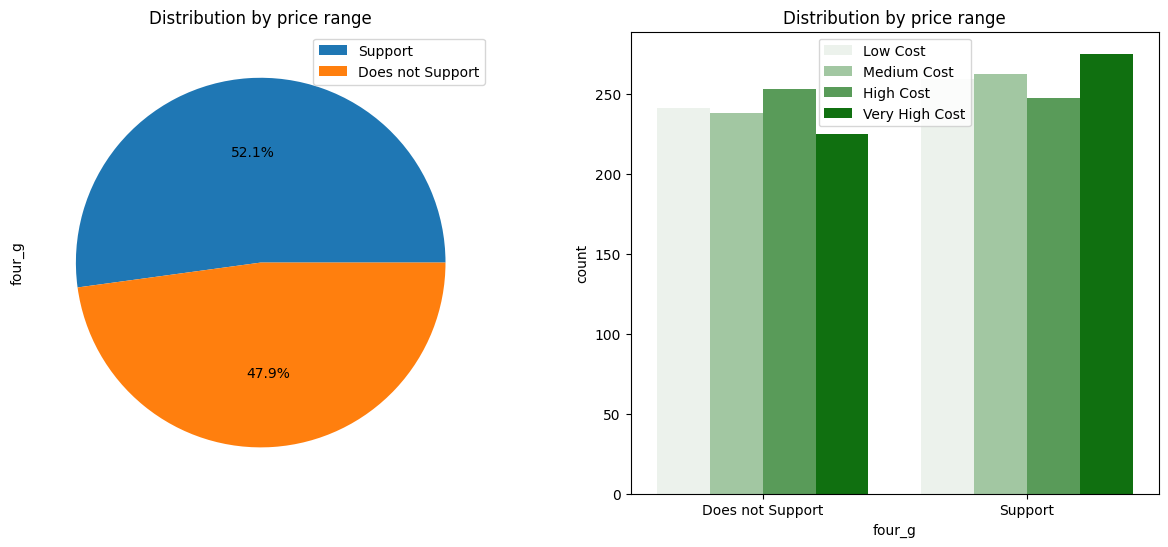

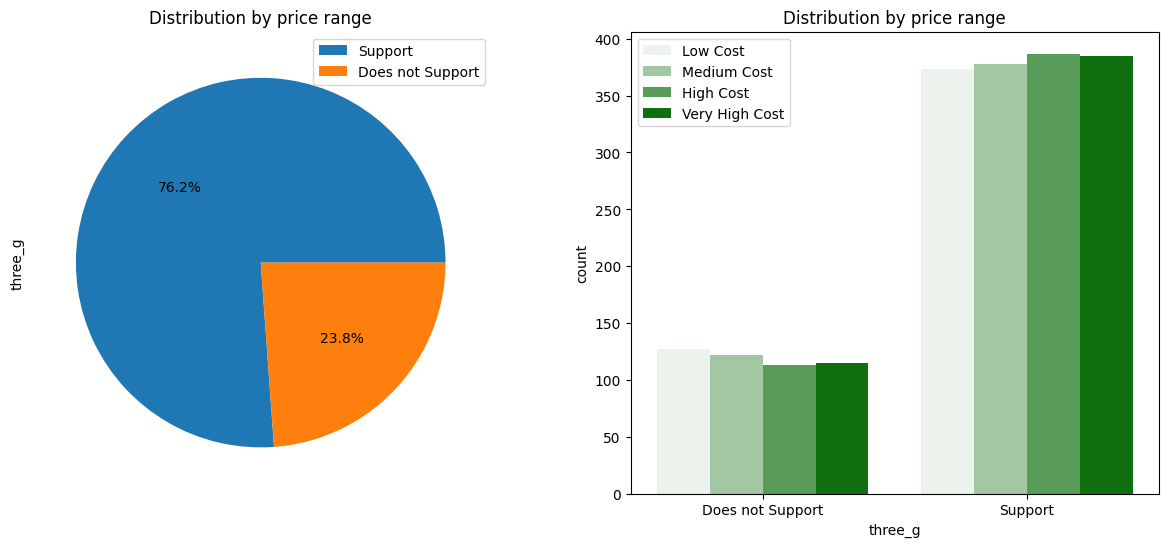

In [118]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,  labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'green')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

Feature 'three_g' play an important feature in prediction

<Axes: >

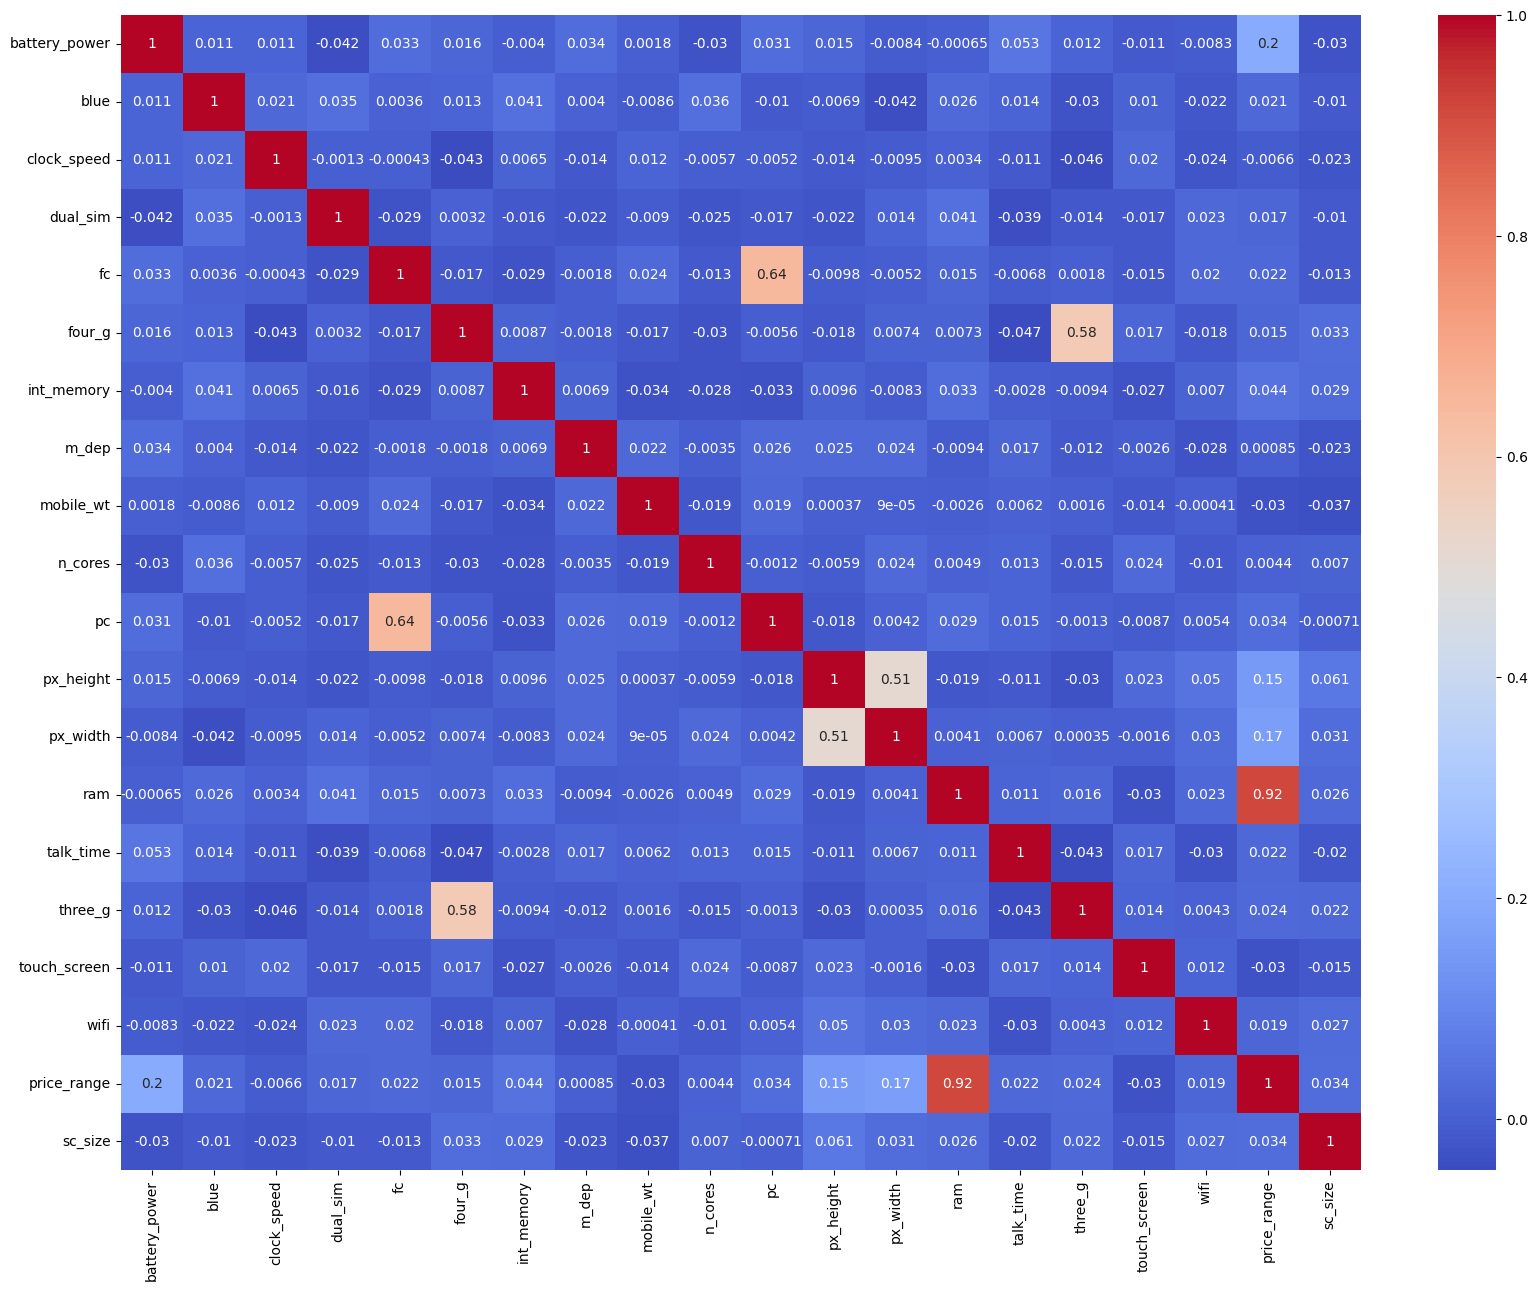

In [119]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

In [120]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

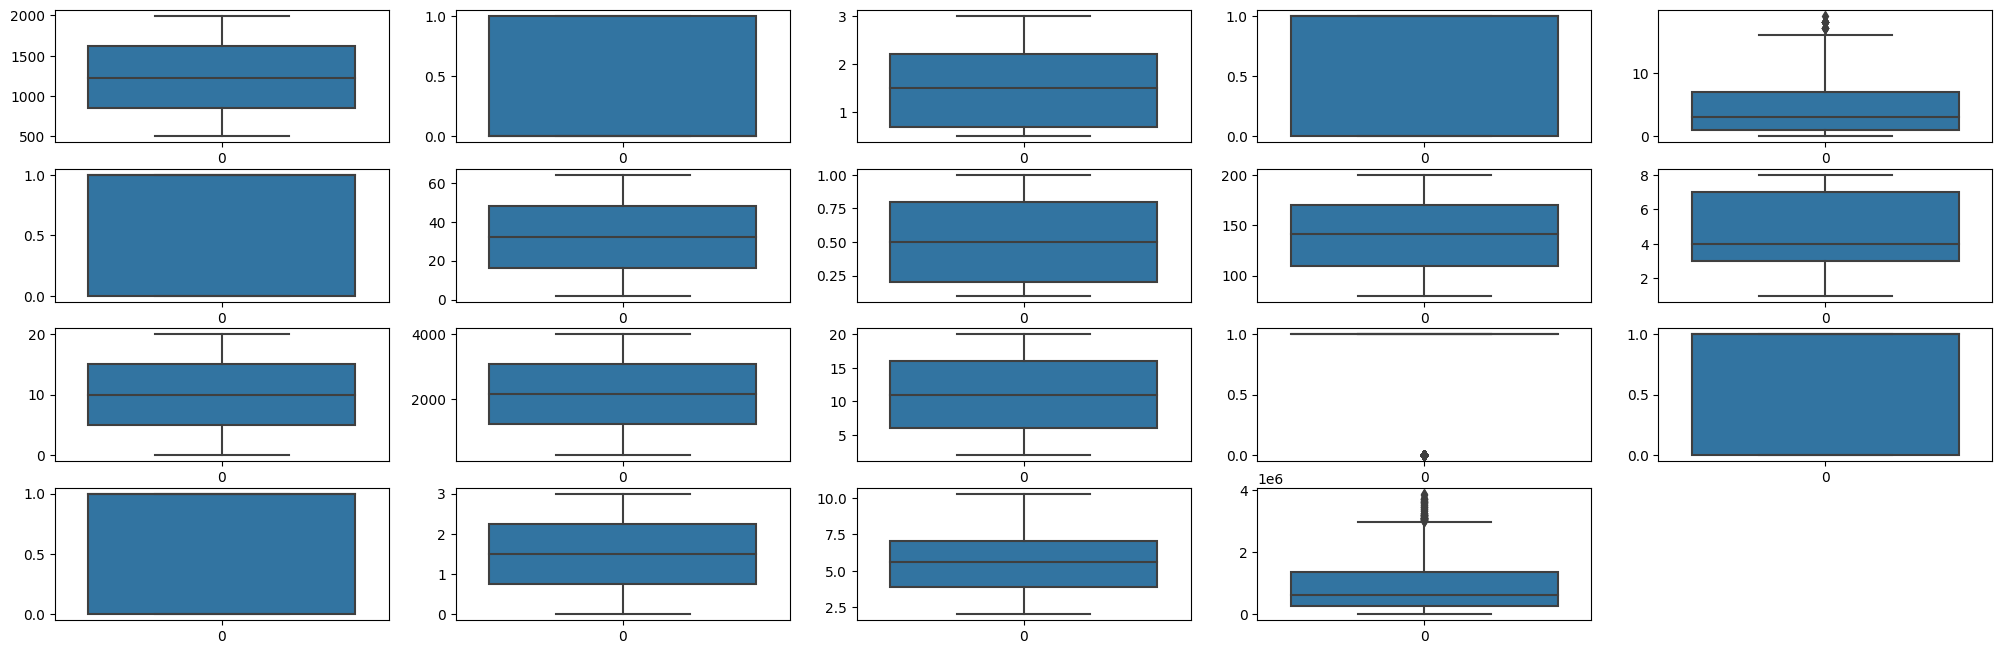

In [121]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

There are almost no outliers in the data

# **Data Preprocessing**

In [122]:
# Defining X and y
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [123]:
X.shape

(2000, 18)

In [124]:
y.shape

(2000,)

In [125]:
# Scaling values of X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [196]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

In [197]:
X_train.shape

(1500, 18)

In [198]:
y_train.shape

(1500,)

# **Model Implementation**

## **Logistic Regression**

In [208]:
# Applying logistic regression


lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [209]:


# Prediction
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [210]:
Logistic_Regression = accuracy_score(y_test, y_pred_test)

In [211]:

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       129
           1       0.92      0.87      0.89       124
           2       0.85      0.89      0.87       115
           3       0.94      0.92      0.93       132

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



[[124   8   0   0]
 [  5 108   5   0]
 [  0   8 102  10]
 [  0   0   8 122]]


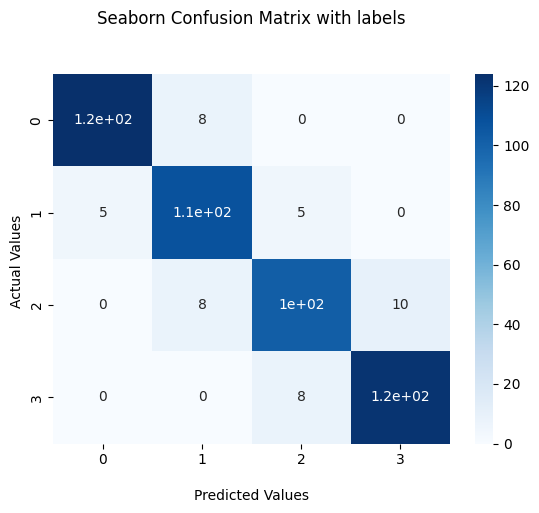

In [212]:

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()


In [213]:
# Evaluation metrics for train
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       372
           1       0.95      0.94      0.94       383
           2       0.92      0.93      0.92       374
           3       0.96      0.96      0.96       371

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



## **Decision tree**

In [214]:
# Applying Decision Tree

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [215]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [216]:
Decision_Tree = accuracy_score(y_test, y_pred_test)

In [217]:

# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       115
           1       0.82      0.70      0.76       138
           2       0.71      0.68      0.69       125
           3       0.82      0.88      0.85       122

    accuracy                           0.80       500
   macro avg       0.80      0.81      0.80       500
weighted avg       0.80      0.80      0.80       500



In [218]:
# Cross validation

grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 0)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy')

In [219]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       132
           1       0.75      0.86      0.80       118
           2       0.78      0.72      0.75       120
           3       0.88      0.89      0.89       130

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



[[115  17   0   0]
 [  6 101  11   0]
 [  0  17  87  16]
 [  0   0  14 116]]


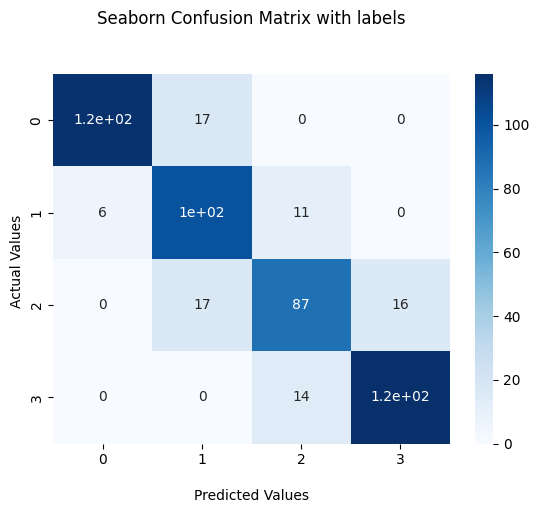

In [220]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [221]:

# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       368
           1       0.81      0.88      0.84       382
           2       0.79      0.82      0.80       380
           3       0.94      0.88      0.91       370

    accuracy                           0.87      1500
   macro avg       0.88      0.87      0.88      1500
weighted avg       0.88      0.87      0.88      1500



## **Random Forest**

In [222]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [223]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.87

In [224]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [225]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       132
           1       0.83      0.84      0.84       118
           2       0.81      0.78      0.80       120
           3       0.90      0.90      0.90       130

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



[[125   7   0   0]
 [ 10  99   9   0]
 [  0  13  94  13]
 [  0   0  13 117]]


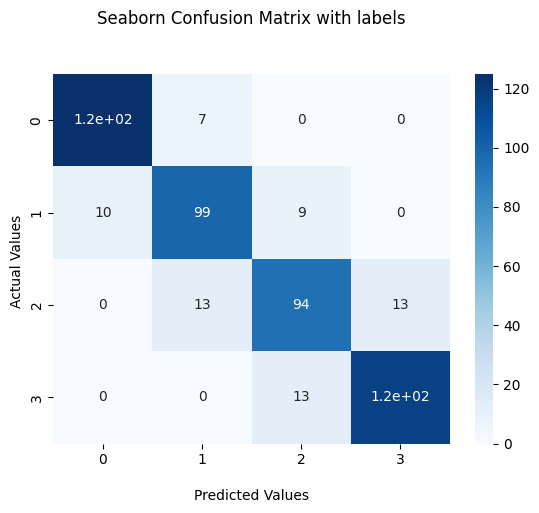

In [226]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [227]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.507055
1,battery_power,0.083655
2,pixels,0.076170
3,mobile_wt,0.041461
4,int_memory,0.041010


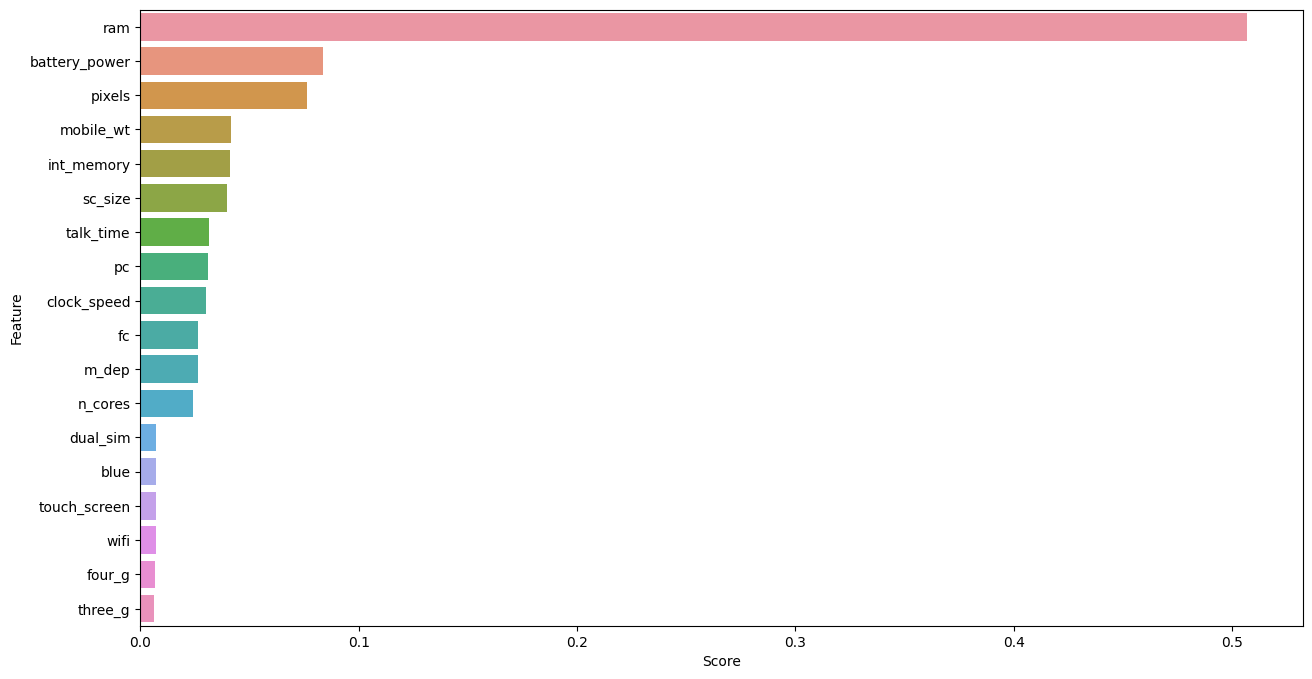

In [228]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

## **Hyperparameter tuning for Random Forest**

In [229]:
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [230]:
clsr.best_params_

{'max_depth': 40,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 50}

In [231]:
clsr.best_estimator_

RandomForestClassifier(max_depth=40, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=50)

In [232]:
clsr.best_score_

0.8584971778375077

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [235]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.86      0.78      0.82        91
           2       0.76      0.82      0.79        92
           3       0.92      0.88      0.90       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



In [274]:
y_pred = clsr.predict(X_test)
Random_Forest = accuracy_score(y_test, y_pred)
Random_Forest

0.865

[[101   4   0   0]
 [  9  71  11   0]
 [  0   8  75   9]
 [  0   0  13  99]]


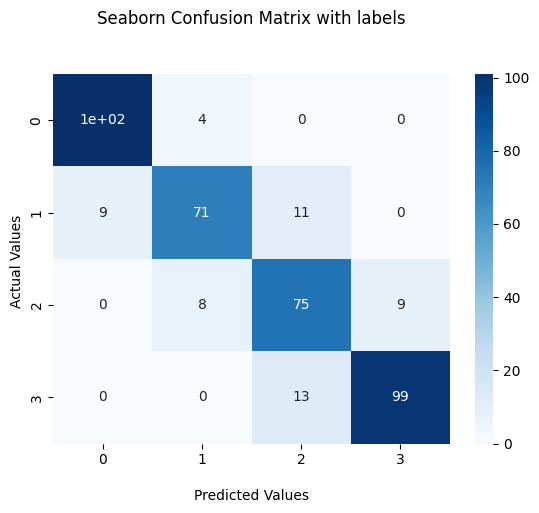

In [236]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()


In [238]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       395
           1       0.93      0.91      0.92       409
           2       0.93      0.93      0.93       408
           3       0.97      0.97      0.97       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [239]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.691744
1,battery_power,0.073756
2,pixels,0.063249
3,mobile_wt,0.025548
4,int_memory,0.024716


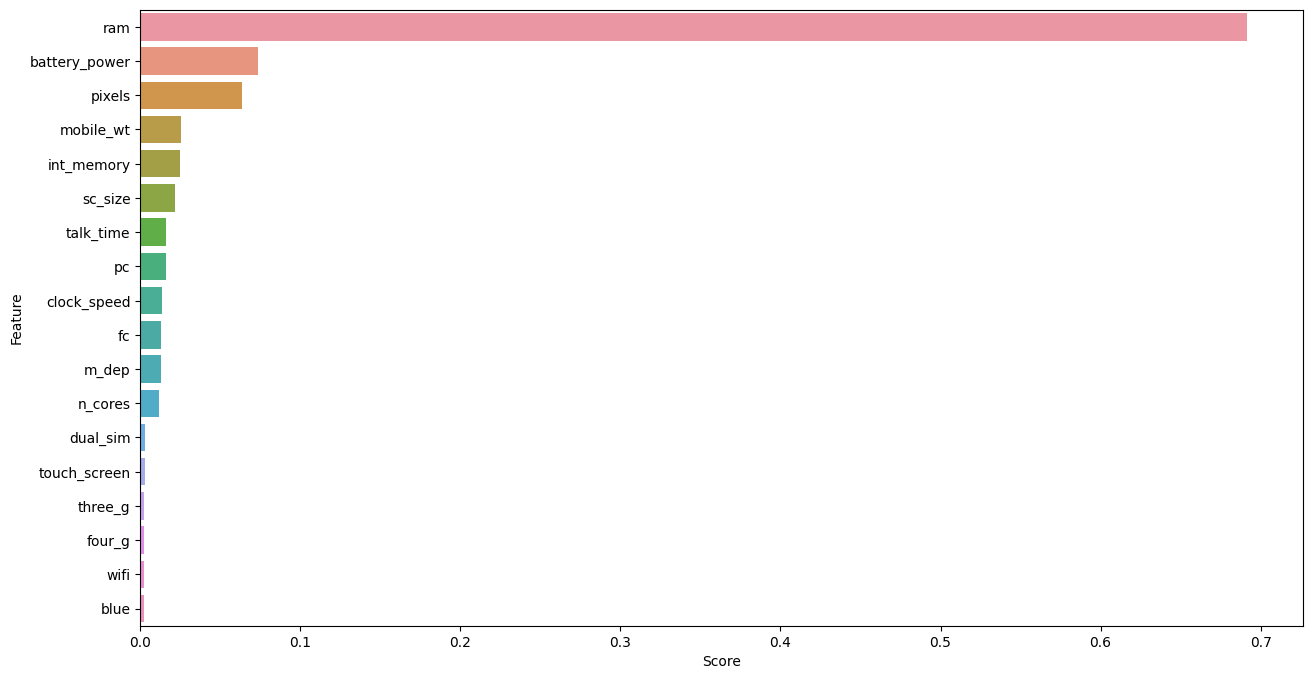

In [240]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

## **xgBoost**

In [241]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)


In [242]:
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.83      0.90      0.86        91
           2       0.81      0.84      0.82        92
           3       0.95      0.88      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [243]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 0)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy')

In [244]:

# Prediction
y_pred_test = grid.predict(X_test)
y_pred_train = grid.predict(X_train)
# Evaluation metrics for test

In [245]:
xg_Boost = accuracy_score(y_test, y_pred_test)

In [246]:
# Prediction
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.86      0.90      0.88        91
           2       0.84      0.88      0.86        92
           3       0.95      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



[[ 98   7   0   0]
 [  6  82   3   0]
 [  0   6  81   5]
 [  0   0  12 100]]


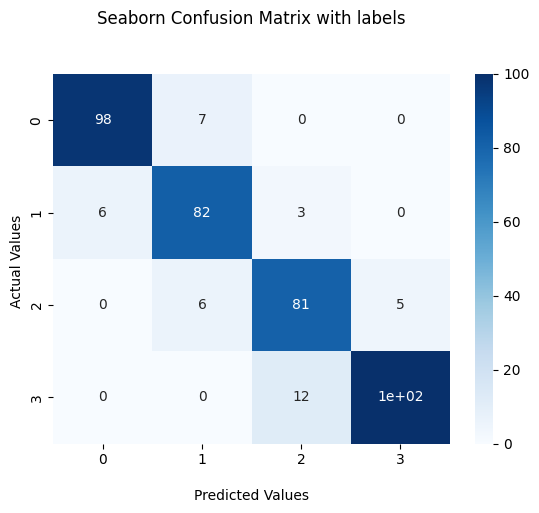

In [247]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

## **K NEAREST NEIGHBORS**

In [248]:
#find the value of k.
error=[]
for i in range(3,250):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  knn_pred = knn.predict(X_test)
  error.append(np.mean(knn_pred!=y_test))

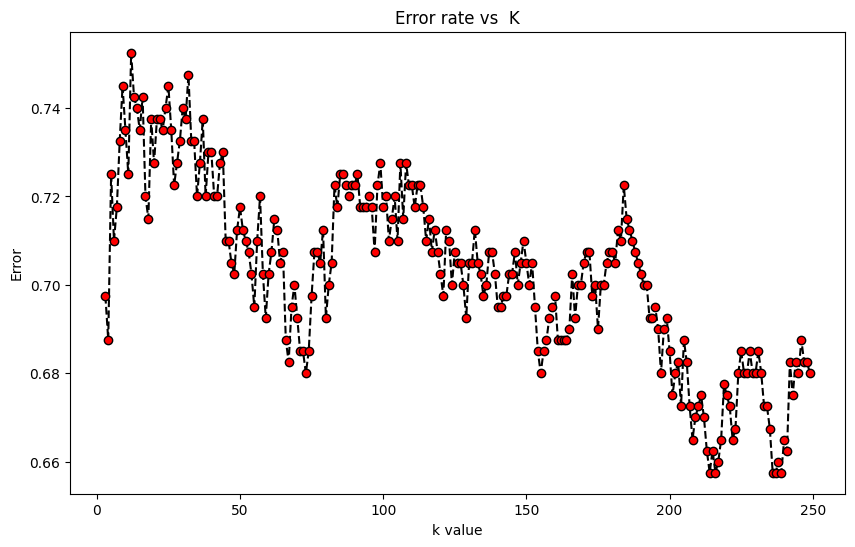

minimum error  0.6575 at the value of k = 212


In [249]:
#Plotting line plot.
plt.figure(figsize=(10,6))
plt.plot(range(3,250),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs  K')
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()
print("minimum error ",min(error),"at the value of k =",error.index(min(error))+1)

In [250]:
#Created an object for KNN.
knn = KNeighborsClassifier(n_neighbors=199,p=1,weights='distance',metric= 'manhattan')

In [251]:
 #Trained the model
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=199, p=1,
                     weights='distance')

In [252]:
#Model Prediction
knn_pred = knn.predict(X_test)

In [253]:
#Checking accuracy
knn_accuracy = accuracy_score(knn_pred,y_test)
knn_accuracy

0.3775

[[52 36 13  4]
 [23 34 21 13]
 [22 22 28 20]
 [ 9 27 39 37]]


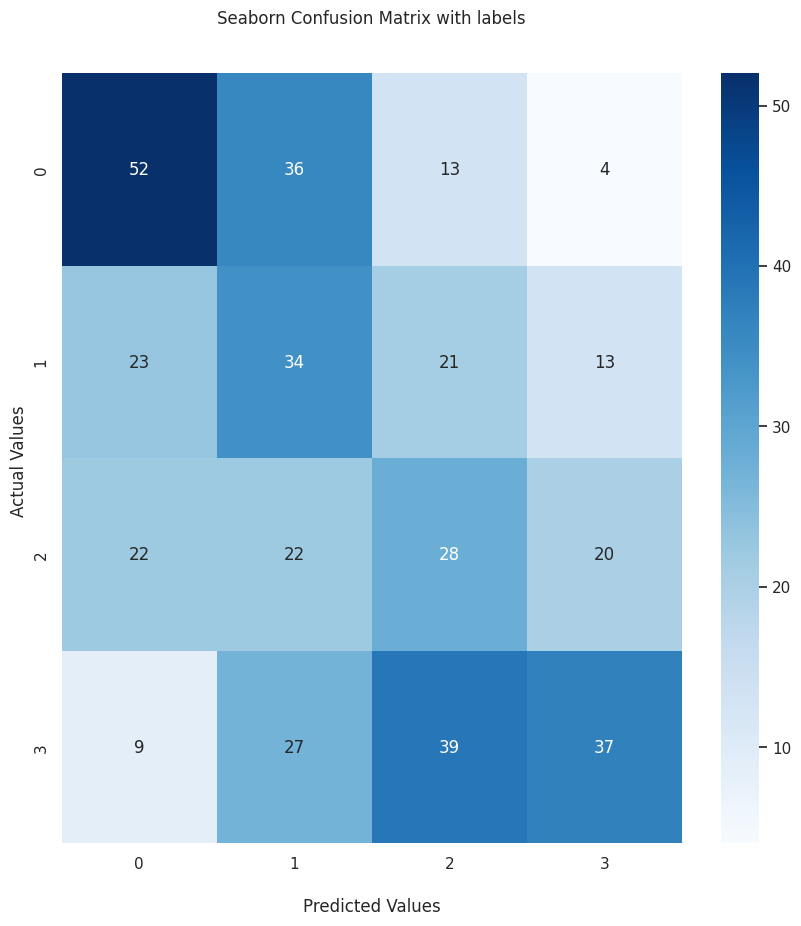

In [267]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,knn_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [255]:
# Evaluation metrics for test

score = classification_report(knn_pred, y_pred_test)
print('Classification Report for K Nearest Neighbour(Test set)=')
print(score)

Classification Report for K Nearest Neighbour(Test set)=
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       106
           1       0.41      0.33      0.36       119
           2       0.32      0.31      0.31       101
           3       0.34      0.49      0.40        74

    accuracy                           0.40       400
   macro avg       0.39      0.40      0.39       400
weighted avg       0.40      0.40      0.39       400



###**Naive Bayes**

In [256]:
#Created an object for GaussianNB
nb=GaussianNB()

In [257]:
#Trained the model
nb.fit(X_train,y_train)

GaussianNB()

In [258]:



#Model Prediction
nb_pred = nb.predict(X_test)

In [259]:
#Checked the accuracy of the model
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.7925

[[94 11  0  0]
 [ 8 63 20  0]
 [ 0 10 69 13]
 [ 0  0 21 91]]


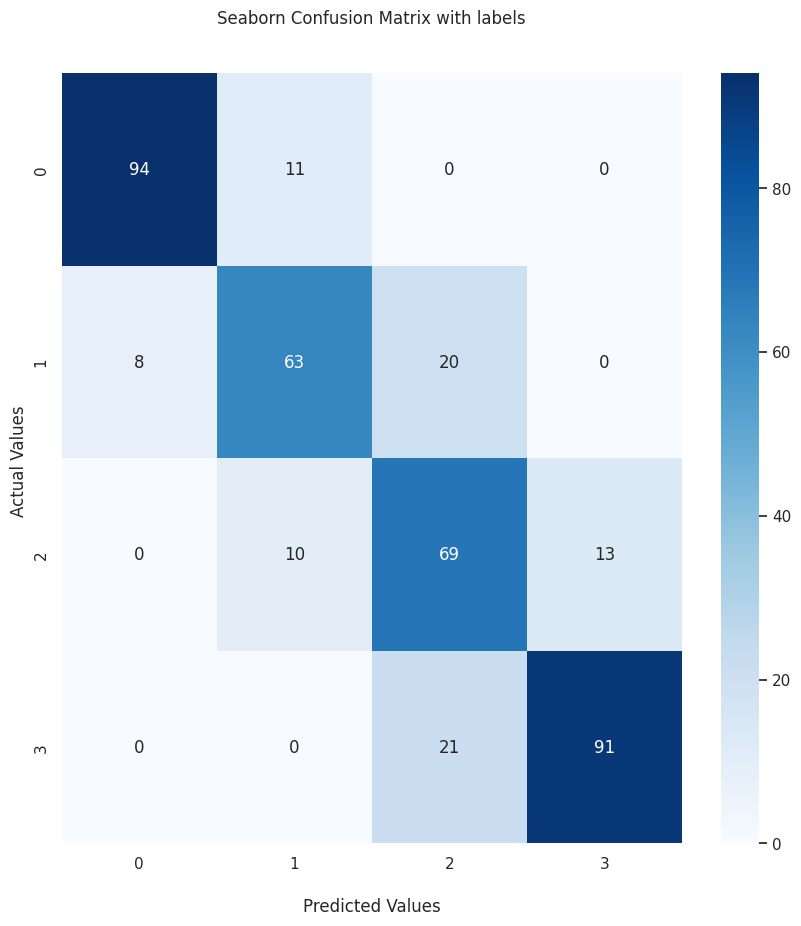

In [268]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, nb_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [266]:
score = classification_report(y_test, nb_pred)
print('Classification Report for Naive Bayes(Test set)= ')
print(score)

Classification Report for Naive Bayes(Test set)= 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.75      0.69      0.72        91
           2       0.63      0.75      0.68        92
           3       0.88      0.81      0.84       112

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.79      0.80       400



###**Support Vector Machine**

In [199]:
#Set the parameters
svc_params = {'C':np.logspace(0, 1, 10),
              'kernel':['linear','rbf', 'poly', 'sigmoid']}

In [200]:
#Hyperparameter tunning and trained the model
svc_cv  = GridSearchCV(SVC(),param_grid=svc_params,verbose=True,scoring='accuracy',n_jobs=2)
svc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(), n_jobs=2,
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [201]:
#got best parameters
svc_cv.best_params_

{'C': 5.994842503189409, 'kernel': 'linear'}

In [202]:
#Trained the model after using best parameters
scv =SVC(C=2,kernel='linear')
scv.fit(X_train,y_train)

SVC(C=2, kernel='linear')

In [203]:
#Model prediction
scv_pred = scv.predict(X_test)

In [204]:
#Checked the accuracy of the model
scv_accuracy = accuracy_score(scv_pred,y_test)

In [205]:
scv_accuracy

0.91

In [206]:
print(classification_report(y_test, scv_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       132
           1       0.86      0.94      0.90       118
           2       0.92      0.81      0.86       120
           3       0.90      0.95      0.92       130

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



[[124   8   0   0]
 [  6 111   1   0]
 [  0  10  97  13]
 [  0   0   7 123]]


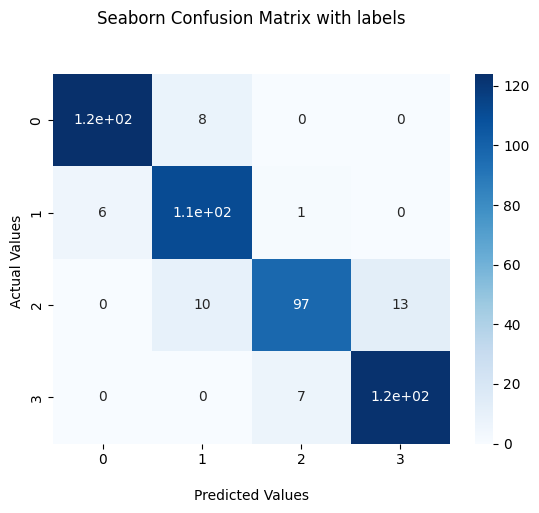

In [207]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, scv_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

#**Evaluation**

In [275]:
#set all the accuracy in data frame
evaluation = pd.DataFrame(data={'Model':['KNN classifier','Naive Bayes','xgboost','Support Vector Machine','Decision Tree','Random Forest','Logistic Regression'], 'accuracy':[knn_accuracy,nb_accuracy,xg_Boost,scv_accuracy,Decision_Tree,Random_Forest,Logistic_Regression]})


In [276]:
#sorting
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)

In [277]:
evaluation

,Model,accuracy
0,Logistic Regression,0.9120
1,Support Vector Machine,0.9100
2,xgboost,0.9025
3,Random Forest,0.8650
4,Decision Tree,0.8000
5,Naive Bayes,0.7925
6,KNN classifier,0.3775


Text(0, 0.5, 'Model')

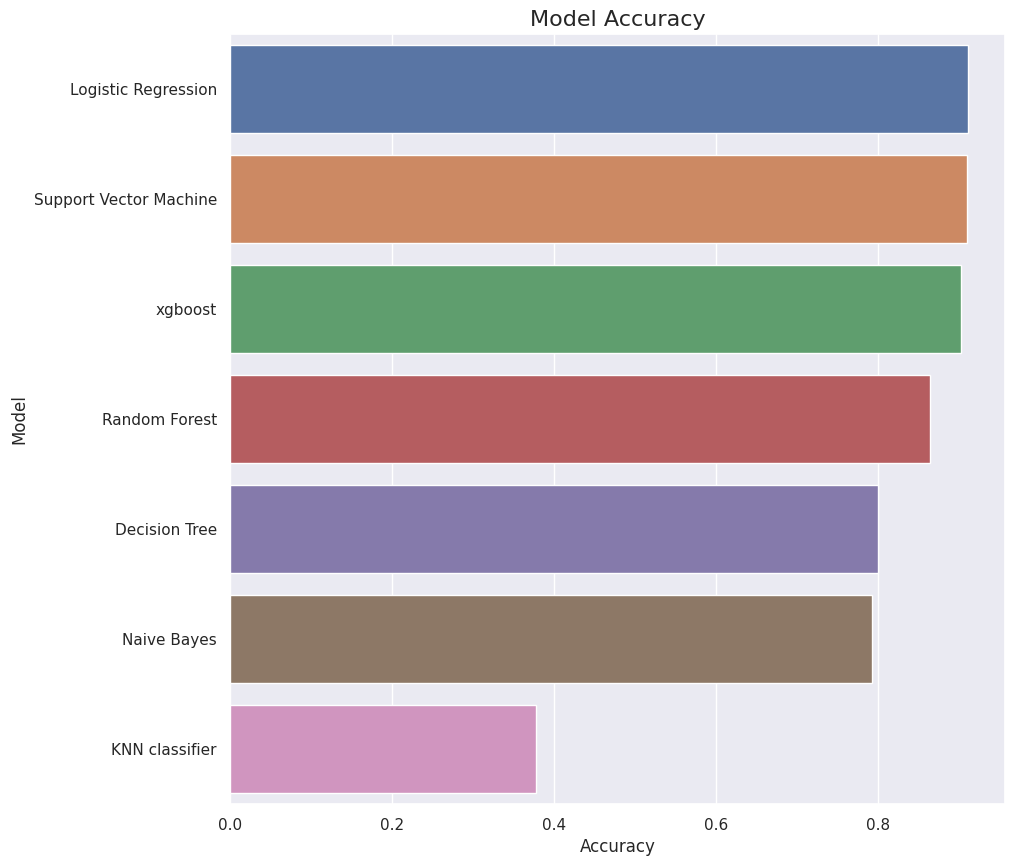

In [278]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=evaluation.accuracy, y=evaluation.Model, orient='h')

#add plot title
plt.title('Model Accuracy', fontsize=16)

#add axis labels
plt.xlabel('Accuracy')
plt.ylabel('Model')


# **Conclusion**
<ol>
<li> The given dataset was very clean it has no null values, no duplicates, and no outliers</li>

<li>Half the devices have Bluetooth, and half don’t there is a gradual increase in battery as the price range increases Ram has continuous increase with price range while moving from Low cost to Very high cost.</li>

<li>Costly phones are lighter.</li>

<li>RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.</li>

<li>Form all the above experiments we can conclude that Logistic Regression>Support Vector Machine>XGboost>Random Forest>Decision Tree> Naive Bayes>KNN with using hyperparameters will got the best results.</li>
</ol>